In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\delhiaqi.csv")

print(df.head())
print(df.info())

                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null   

In [3]:
print("Initial Missing Values:\n", df.isnull().sum())  #no missing values, all the 561 rows are completely filled with data 

Initial Missing Values:
 date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print("Date column type:", df['date'].dtype)
df = df.dropna(subset=['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

print(df[['date', 'year', 'month', 'day', 'hour']].head())

Date column type: datetime64[ns]
                 date  year  month  day  hour
0 2023-01-01 00:00:00  2023      1    1     0
1 2023-01-01 01:00:00  2023      1    1     1
2 2023-01-01 02:00:00  2023      1    1     2
3 2023-01-01 03:00:00  2023      1    1     3
4 2023-01-01 04:00:00  2023      1    1     4


In [5]:
num_duplicates = df.duplicated().sum()

if num_duplicates == 0:
    print("No duplicate rows found in the dataset.")
else:
    print(f"Found {num_duplicates} duplicate rows. Removing them...")
    df = df.drop_duplicates()
    print(" Duplicates removed.")

No duplicate rows found in the dataset.


In [7]:
# Average AQI per hour of the day
df['hour'] = df['date'].dt.hour
hourly_avg = df.groupby('hour')['AQI'].mean()

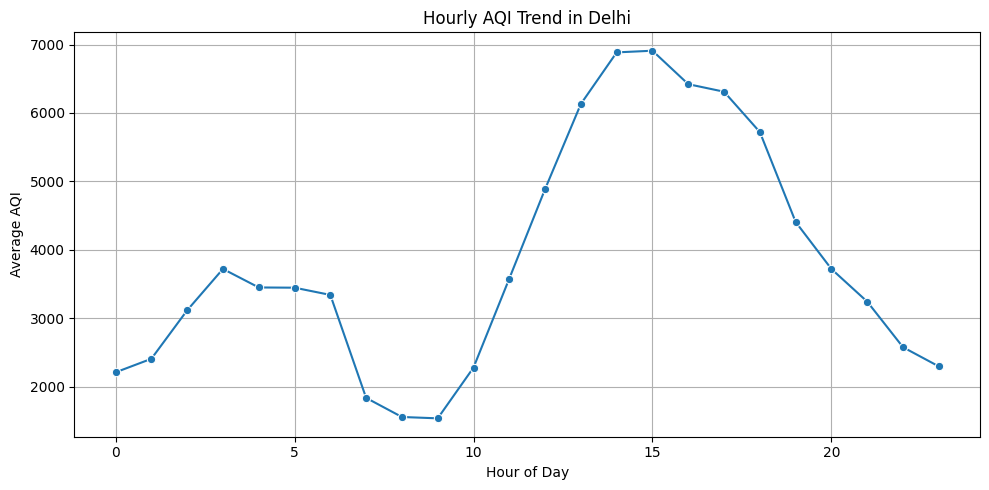

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title('Hourly AQI Trend in Delhi')
plt.xlabel('Hour of Day')
plt.ylabel('Average AQI')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
daily_aqi = df.set_index('date')['AQI'].resample('D').mean()

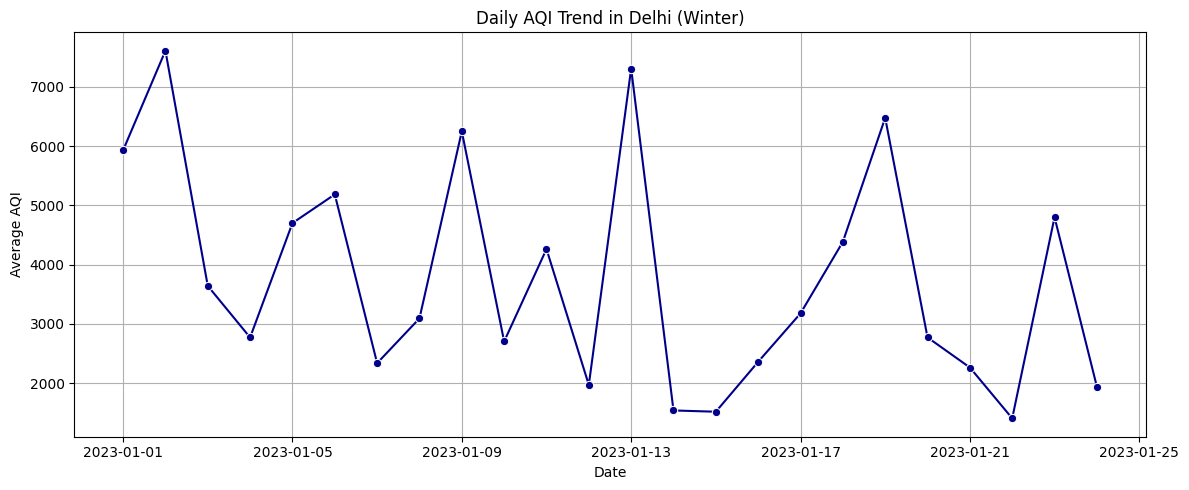

In [11]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_aqi, marker='o', color='darkblue')
plt.title('Daily AQI Trend in Delhi (Winter)')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
mean_pollutants = df[pollutants].mean().sort_values(ascending=False)

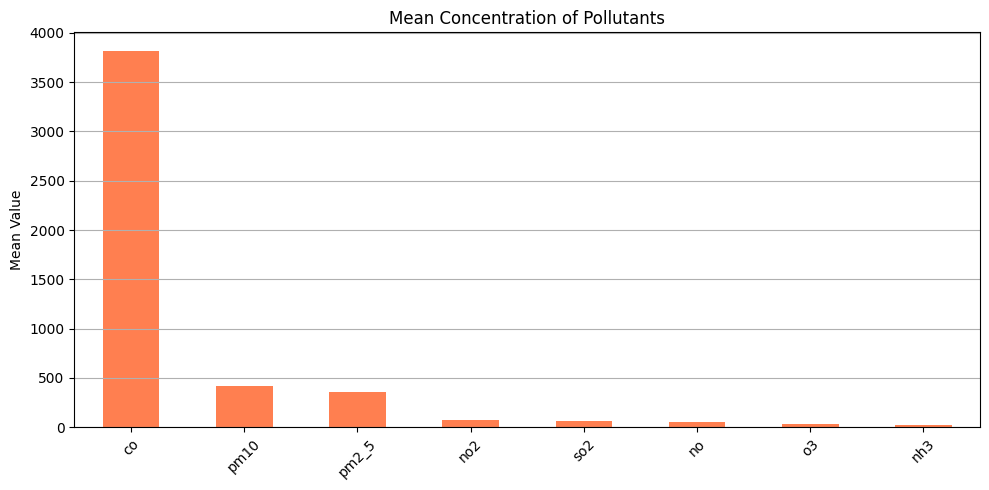

In [13]:
mean_pollutants.plot(kind='bar', figsize=(10,5), color='coral')
plt.title('Mean Concentration of Pollutants')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

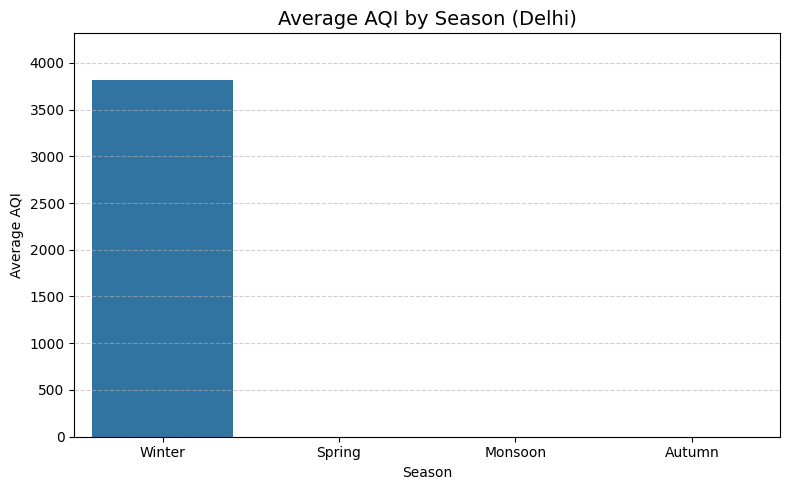

In [14]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Autumn'

df['date'] = pd.to_datetime(df['date'])
df['season'] = df['date'].dt.month.map(get_season)

# Calculate AQI if not already done
df['AQI'] = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].max(axis=1)

# Group by season
seasonal_aqi_summary = df.groupby('season')['AQI'].mean().reindex(['Winter', 'Spring', 'Monsoon', 'Autumn'])

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_aqi_summary.index, y=seasonal_aqi_summary.values)
plt.title('Average AQI by Season (Delhi)', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Average AQI')
plt.ylim(0, seasonal_aqi_summary.max() + 500)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


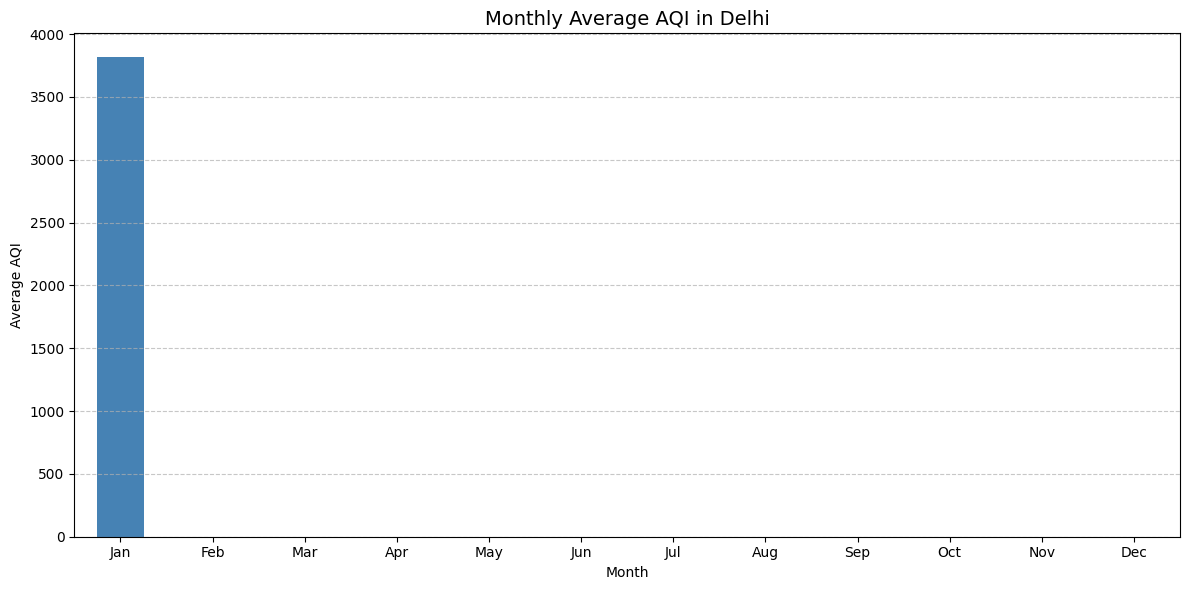

In [15]:
# Step 1: Convert date column to datetime if not already done
df['date'] = pd.to_datetime(df['date'])

# Step 2: Extract month name abbreviation
df['month'] = df['date'].dt.month_name().str[:3]

# Step 3: Calculate AQI if not already computed
df['AQI'] = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].max(axis=1)

# Step 4: Define correct month order for plotting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Step 5: Group by month and calculate average AQI
monthly_aqi = df.groupby('month')['AQI'].mean().reindex(month_order)

# Step 6: Plotting the bar chart
plt.figure(figsize=(12, 6))
monthly_aqi.plot(kind='bar', color='steelblue')
plt.title('Monthly Average AQI in Delhi', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()